In [1]:
import numpy as np
import embedded_voting as ev
import matplotlib.pyplot as plt
from tqdm import tqdm
np.random.seed(42)

Dans les experiences qui suivent, on compare 
* Sum Scores
* Product Scores
* MLE Gaussian
* SVD Nash

A chaque fois, il faut bien initaliser la seed pour qu'on utilise les mêmes truth value

In [66]:
rules = [ev.RuleFastNash(), ev.RuleSumRatings(), ev.RuleProductRatings(), ev.RuleMLEGaussian()]

In [19]:
list_agg = [ev.Aggregator(rule=ev.RuleFastNash(), name="SVDNash"),
            ev.Aggregator(rule=ev.RuleRatingsHistory(rule=ev.RuleSumRatings()), name="RuleSumRatings"),
            ev.Aggregator(rule=ev.RuleRatingsHistory(rule=ev.RuleProductRatings()), name="RuleProductRatings"),
            ev.Aggregator(rule=ev.RuleRatingsHistory(rule=ev.RuleMLEGaussian()), name="RuleMLEGaussian Cold"),
            ev.Aggregator(rule=ev.RuleRatingsHistory(rule=ev.RuleMLEGaussian()), name="RuleMLEGaussian 500")]

# Experience 1

On part de 30 algos dans un groupes puis on ajoute petit à petit des groupes de 1 algos (de 0 à 10)

In [132]:
groups_sizes = [30] + [1]*10
features = np.eye(11)
generator = ev.RatingsGeneratorEpistemicGroupsMixFree(groups_sizes, 
                                                            features, 
                                                            group_noise=8, 
                                                            independent_noise=2,
                                                            center_gap=10, 
                                                            max_scale=2,
                                                            truth_generator=None,
                                                            group_noise_f=np.random.normal,
                                                            independent_noise_f=np.random.normal)


In [133]:
n_candidates = 20
n_trys = 100
results_exp = np.zeros((11,len(list_agg)))
for i in tqdm(range(11)):
    #generator = experiment_1_generator(i)
    
    results = np.zeros(len(list_agg))
    np.random.seed(42)
    for tt in range(n_trys):
        for agg in list_agg:
            agg.reset()

        ## training the MLE 500
        ratings = generator(500)[:30+i]
        
        truth = generator.ground_truth_
        ratings = np.maximum(ratings, 0)
        _ = list_agg[-1](ratings).winner_

        ratings = generator(n_candidates)[:30+i]
        truth = generator.ground_truth_
        ratings = np.maximum(ratings, 0)
        # getting the results
        welfare = ev.RuleSumRatings()(ev.Ratings([truth])).welfare_

        results_i = []
        for agg in list_agg:
            w = agg(ratings).winner_
            results_i.append(welfare[w])
        results += results_i
    results_exp[i] = results/n_trys

100%|██████████| 11/11 [01:46<00:00,  9.71s/it]


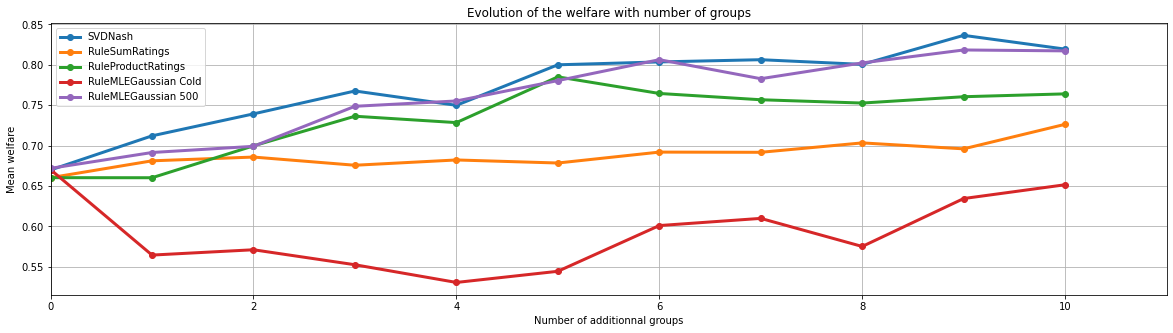

In [134]:
rules_names = [agg.name for agg in list_agg]
_ = plt.figure(figsize=(20, 5))
for i, r in enumerate(results_exp.T):
    plt.plot(np.arange(0,11), r, 'o-', label=rules_names[i], linewidth=3)

#plt.ylim(0.8, 1)
plt.xlim(0,11)
plt.xlabel("Number of additionnal groups")
plt.ylabel("Mean welfare")
plt.title("Evolution of the welfare with number of groups")
plt.legend()
plt.grid(0.3)
plt.show()
    

# Experience 2

On part de (1,1,1,1,1) et on augmente le nombre d'algos dans le groupe 1 jusqu'à 30

In [50]:

groups_sizes = [30,2,2,1]
features = np.eye(4)
generator = ev.RatingsGeneratorEpistemicGroupsMixFree(groups_sizes, 
                                                            features, 
                                                            group_noise=8, 
                                                            independent_noise=0.5,
                                                            center_gap=10, 
                                                            max_scale=2,
                                                            truth_generator=None,
                                                            group_noise_f=np.random.normal,
                                                            independent_noise_f=np.random.normal)


In [51]:
n_candidates = 20
n_trys = 250
list_val = range(1,30,2)
results_exp = np.zeros((len(list_val),len(list_agg)))
for j in tqdm(range(len(list_val))):
    i = list_val[j]
    #generator = experiment_1_generator(i)
    
    results = np.zeros(len(list_agg))
    for _ in range(n_trys):
        for agg in list_agg:
            agg.reset()

        ## training the MLE 500
        ratings = generator(500)[29-i:]
        truth = generator.ground_truth_
        ratings = np.maximum(ratings, 0)
        _ = list_agg[-1](ratings).winner_

        ratings = generator(n_candidates)[29-i:]
        truth = generator.ground_truth_
        ratings = np.maximum(ratings, 0)
        # getting the results
        welfare = ev.RuleSumRatings()(ev.Ratings([truth])).welfare_

        results_i = []
        for agg in list_agg:
            w = agg(ratings).winner_
            results_i.append(welfare[w])
        results += results_i
    results_exp[j] = results/n_trys

100%|██████████| 15/15 [02:52<00:00, 11.48s/it]


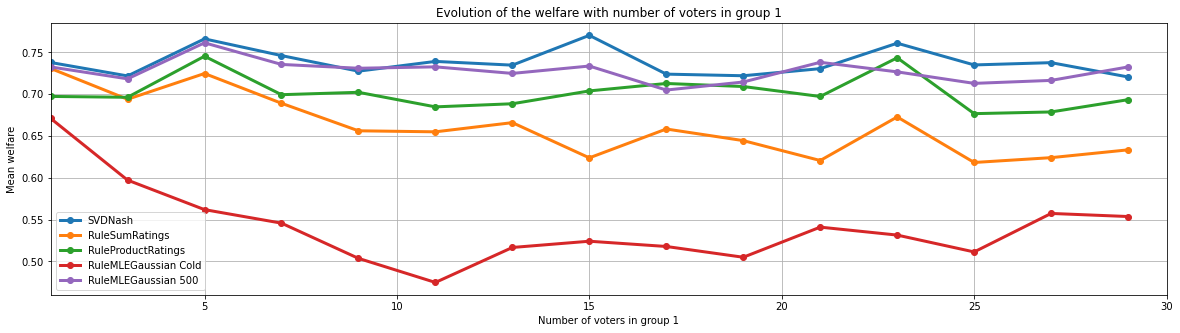

In [52]:
rules_names = [agg.name for agg in list_agg]
_ = plt.figure(figsize=(20, 5))
for i, r in enumerate(results_exp.T):
    plt.plot(list_val, r, 'o-', label=rules_names[i], linewidth=3)

#plt.ylim(0.8, 1)
plt.xlim(1,30)
plt.xlabel("Number of voters in group 1")
plt.ylabel("Mean welfare")
plt.title("Evolution of the welfare with number of voters in group 1")
plt.legend()
plt.grid(0.3)
plt.show()

# Experience 3

On a quatre groupes (30,2,2,1) et on augmente le nombre de candidats de 4 à 30

In [58]:
n_trys = 250
list_val = range(5,32,2)
results_exp = np.zeros((len(list_val),len(list_agg)))
for j in tqdm(range(len(list_val))):
    i = list_val[j]
    #generator = experiment_1_generator(i)
    
    results = np.zeros(len(list_agg))
    for _ in range(n_trys):
        for agg in list_agg:
            agg.reset()

        ## training the MLE 500
        ratings = generator(500)
        ratings = np.maximum(ratings, 0)
        _ = list_agg[-1](ratings).winner_

        ratings = generator(30)[:,:i]
        truth = generator.ground_truth_[:i]
        ratings = np.maximum(ratings, 0)
        # getting the results
        welfare = ev.RuleSumRatings()(ev.Ratings([truth])).welfare_

        results_i = []
        for agg in list_agg:
            w = agg(ratings).winner_
            results_i.append(welfare[w])
        results += results_i
    results_exp[j] = results/n_trys

100%|██████████| 14/14 [04:19<00:00, 18.54s/it]


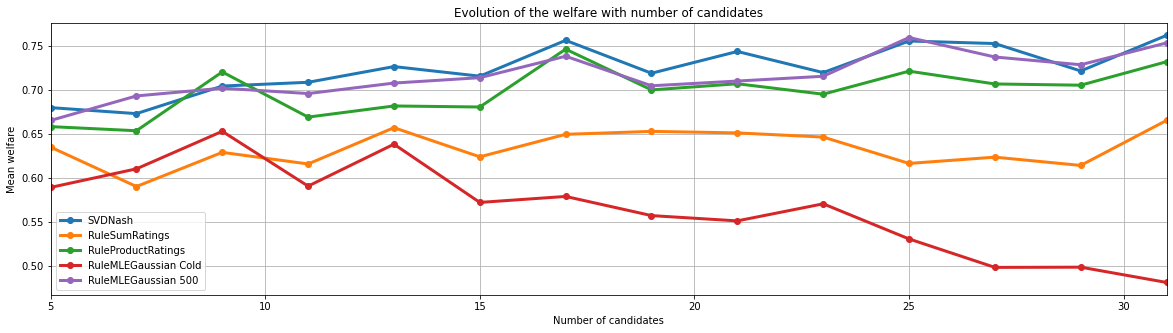

In [59]:
rules_names = [agg.name for agg in list_agg]
_ = plt.figure(figsize=(20, 5))
for i, r in enumerate(results_exp.T):
    plt.plot(list_val, r, 'o-', label=rules_names[i], linewidth=3)

#plt.ylim(0.8, 1)
plt.xlim(5,31)
plt.xlabel("Number of candidates")
plt.ylabel("Mean welfare")
plt.title("Evolution of the welfare with number of candidates")
plt.legend()
plt.grid(0.3)
plt.show()

Pourquoi ça augmente ? => Plus de candidat, donc plus de proba d'avoir un candidat au welfare élevé.

# Experiment 4 - Bonus


In [62]:
import json
with open('../../../../../../Thèse/Mai 2022/opinions.json', 'r') as f:
    dict_opinions = json.load(f)
    

In [85]:
candidats = ['Philippe Poutou', 'Nathalie Arthaud', 'Fabien Roussel', 'Jean-Luc Mélenchon', 'Anne Hidalgo', 'Yannick Jadot', 'Emmanuel Macron', 'Jean Lassalle', 'Valérie Pecresse', 'Nicolas Dupont-Aignan', 'Marine Le Pen', 'Eric Zemmour']

In [130]:
votes = np.array([e['opinions'] for e in dict_opinions])
vote_pres = votes[np.random.choice(len(votes), 400)]/1000+0.1
vote_pres

array([[0.15 , 0.1  , 0.15 , ..., 0.1  , 0.1  , 0.1  ],
       [0.168, 0.163, 0.167, ..., 0.112, 0.1  , 0.1  ],
       [0.144, 0.1  , 0.109, ..., 0.115, 0.112, 0.106],
       ...,
       [0.15 , 0.15 , 0.1  , ..., 0.1  , 0.1  , 0.1  ],
       [0.2  , 0.2  , 0.1  , ..., 0.1  , 0.1  , 0.1  ],
       [0.159, 0.16 , 0.178, ..., 0.1  , 0.106, 0.1  ]])

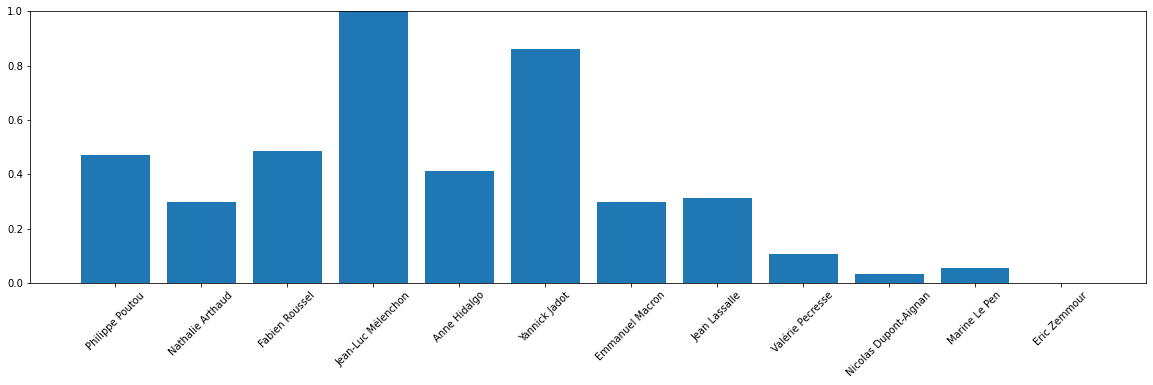

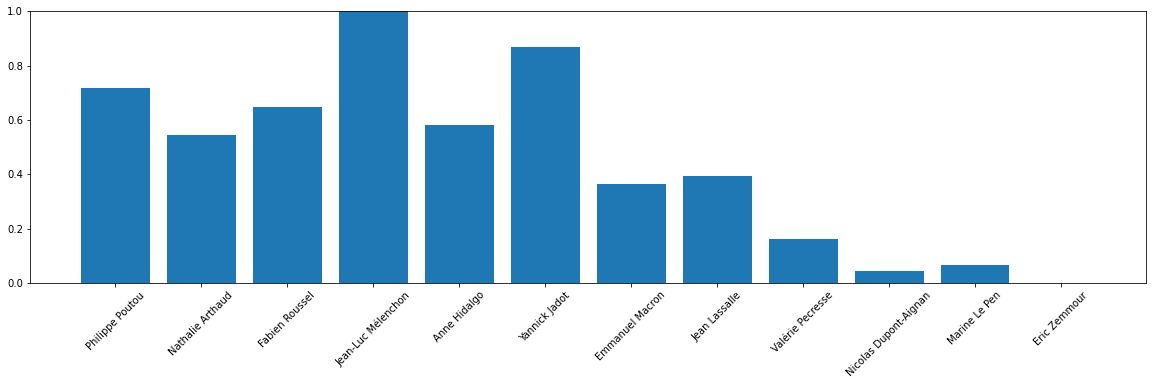

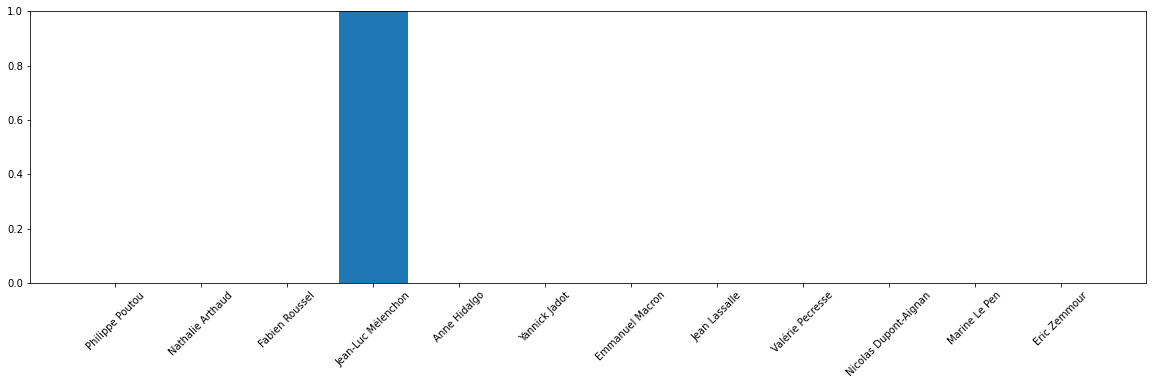

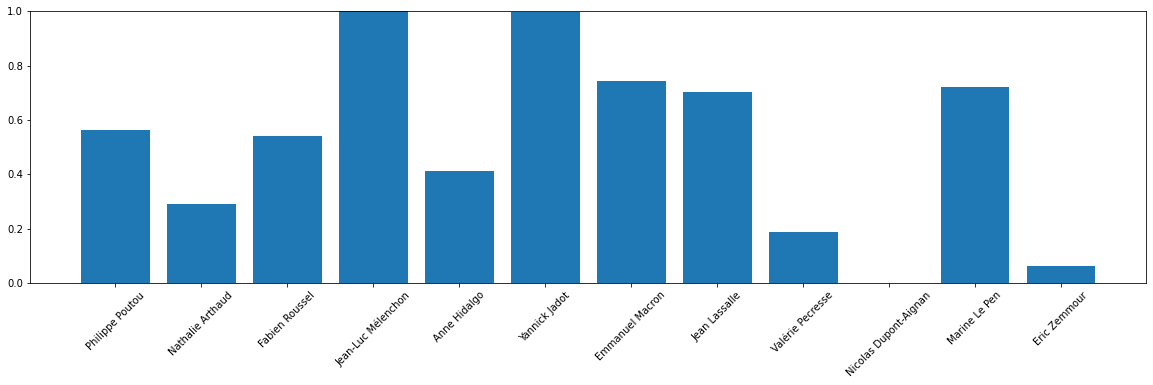

In [131]:
for i,r in enumerate(rules):
    r(vote_pres)
    welf = r.welfare_
    plt.figure(figsize=(20,5))
    plt.bar(np.arange(12), welf)
    plt.ylim(0,1)
    plt.xticks(np.arange(12), candidats,rotation=45)
    plt.show()